Simple Python Notebook

In [1]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

In [88]:
UPRO = yf.download(tickers='UPRO')

[*********************100%***********************]  1 of 1 completed


In [89]:
SPY = yf.download(tickers='SPY')

[*********************100%***********************]  1 of 1 completed


In [201]:
start = '2011-06-27'
end = '2021-06-25'
ratio1 = 100/UPRO.loc[start]['Adj Close']
ratio2 = 100/SPY.loc[start]['Adj Close']

In [208]:
spy_ob.dividends[start:end]

Date
2011-09-16    0.625
2011-12-16    0.770
2012-03-16    0.614
2012-06-15    0.688
2012-09-21    0.779
2012-12-21    1.022
2013-03-15    0.694
2013-06-21    0.839
2013-09-20    0.838
2013-12-20    0.980
2014-03-21    0.825
2014-06-20    0.937
2014-09-19    0.939
2014-12-19    1.135
2015-03-20    0.931
2015-06-19    1.030
2015-09-18    1.033
2015-12-18    1.212
2016-03-18    1.050
2016-06-17    1.078
2016-09-16    1.082
2016-12-16    1.329
2017-03-17    1.033
2017-06-16    1.183
2017-09-15    1.235
2017-12-15    1.351
2018-03-16    1.097
2018-06-15    1.246
2018-09-21    1.323
2018-12-21    1.435
2019-03-15    1.233
2019-06-21    1.432
2019-09-20    1.384
2019-12-20    1.570
2020-03-20    1.406
2020-06-19    1.366
2020-09-18    1.339
2020-12-18    1.580
2021-03-19    1.278
2021-06-18    1.376
Name: Dividends, dtype: float64

In [188]:
upro_ob.actions

,Dividends,Stock Splits
Date,,
2009-09-24,0.001750,0.0
2009-12-23,0.002722,0.0
2010-03-24,0.001778,0.0
2010-06-22,0.004861,0.0
2010-09-21,0.003694,0.0
2011-02-25,0.000000,3.0
2011-09-21,0.002833,0.0
2012-06-20,0.002167,0.0
2012-12-26,0.001417,0.0


In [203]:
upro = np.array(UPRO.loc[start:end]['Adj Close']*ratio1)
spy = np.array(SPY.loc[start:end]['Adj Close']*ratio2)

In [234]:
days = len(upro)

In [211]:
upro[0] == spy[0]

True

In [159]:
upro_ob = yf.Ticker('UPRO')

In [214]:
ratio1, ratio2

(17.17211136809638, 0.9511422095189109)

In [329]:
ratio1*sum(upro_ob.dividends.loc[start:end]), ratio2*sum(spy_ob.dividends.loc[start:end])

(13.500164450033596, 42.13274645505919)

In [235]:
day = np.arange(1, days + 1)

In [312]:
upro[0], spy[0], day[-1]

(100.0, 100.0, 2517)

In [313]:
spy[-1], upro[-1], upro[-1]/spy[-1]

(405.76676407011536, 1927.054358689826, 4.74916757439709)

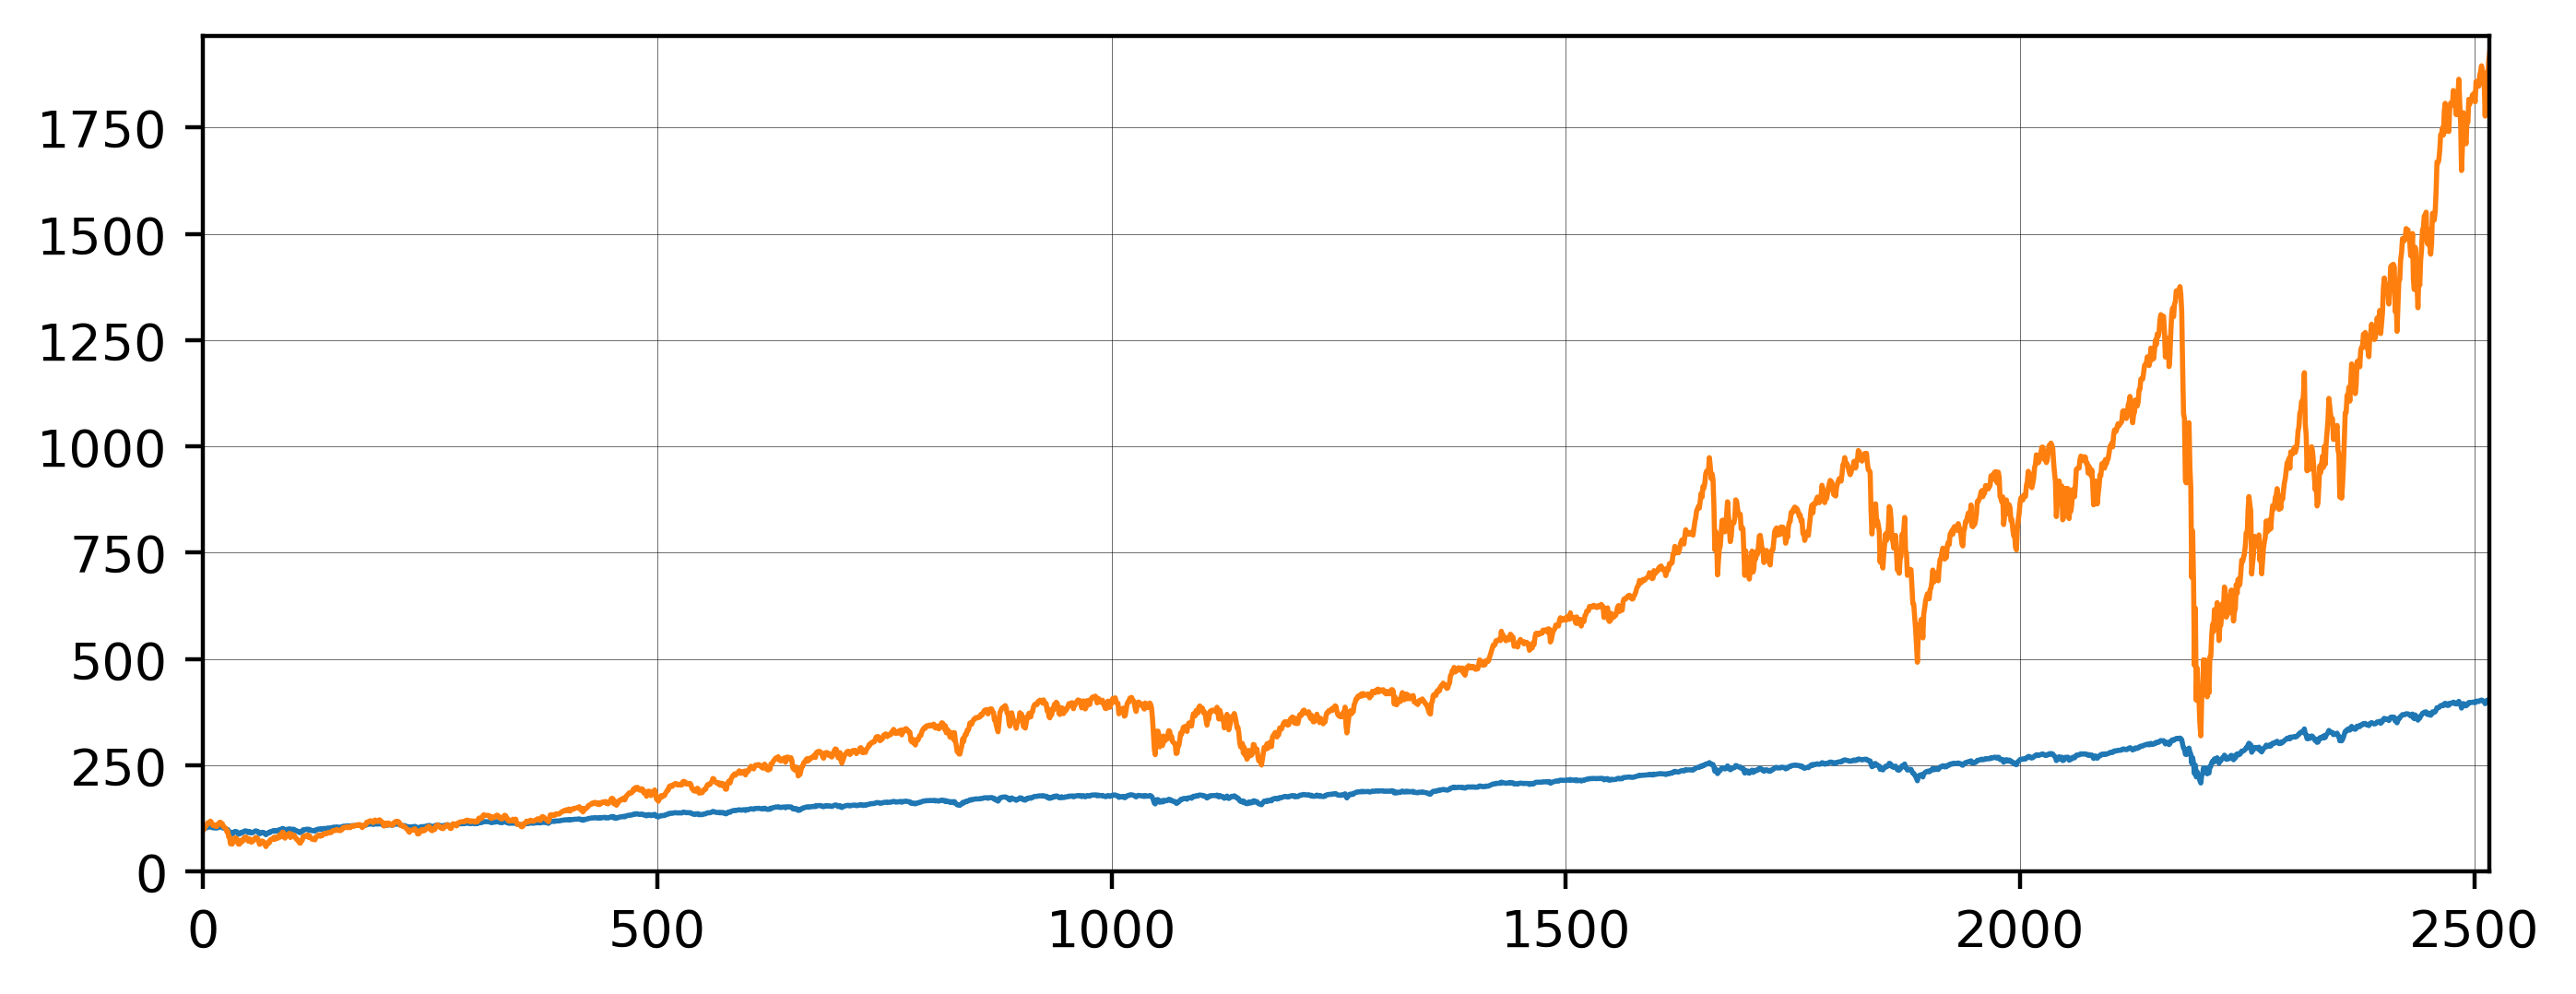

In [330]:
last = day[-1]
first = 0
ymax = int(1.02*max(upro[:last].max(),spy[:last].max()) )
figure(figsize=(8, 3), dpi=400)
plt.plot(day[first:last], spy[first:last], linewidth=1)
plt.plot(day[first:last], upro[first:last], linewidth=1)
plt.axis([first, last, 0, ymax])
# plt.tick_params(labeltop=True, labelright=True)
plt.grid(color='k', linestyle='-', linewidth=0.1)
#plt.yscale('log')

plt.show()

In [340]:
uproa = [(upro[x]-upro[x-1])/upro[x-1] for x in range(1, day[-1]) if upro[x-1] <= upro[x]]

In [339]:
uprob = [(upro[x-1]-upro[x])/upro[x-1] for x in range(1, day[-1]) if upro[x-1] > upro[x]]

In [341]:
len(uprob) + len(uproa), day[-1]

(2516, 2517)

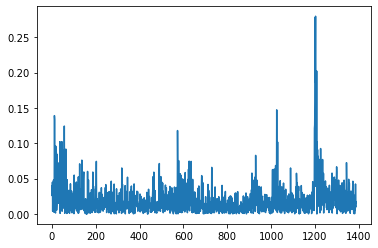

In [349]:
plt.plot(np.arange(0, len(uproa)), uproa)

In [368]:
bins = [0.005*x for x in range(0, 50)]

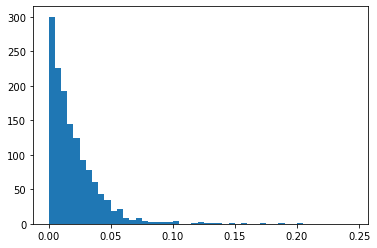

In [369]:
plt.hist(uproa,bins=bins)
plt.show()

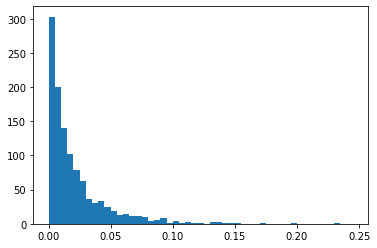

In [370]:
plt.hist(uprob,bins=bins)
plt.show()